# 2-Classification-Su İçilebilirliği ve Kalitesi Analizi

<img src="water.jpg">

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

Su kalitesi analizi, suyun içilebilirliğini belirlemek için kullanılan önemli bir uygulama alanıdır. Bu tür bir projeyi gerçekleştirmek için veri setinizi Kaggle'dan aldınız ve şimdi bu veri setini daha ayrıntılı bir şekilde incelemeniz gerekiyor. Aşağıda projenizi ilerletmek için izlemeniz gereken temel adımları bulabilirsiniz:

1. **Veri Setini İnceleme:**
   - Veri setinizi açın ve içeriğini inceleyin. Hangi özellikler (sütunlar) bulunuyor? Bu özellikler su kalitesini etkileyen faktörleri temsil ediyor mu?

2. **Veri Temizleme:**
   - Veri setinizde eksik veya aykırı değerleri ele alın. Eksik değerleri doldurun veya uygun bir şekilde işaretleyin. Aykırı değerlerin etkisini değerlendirin ve gerekirse düzeltin.

3. **Veri Görselleştirme:**
   - Her bir özelliği görselleştirerek su kalitesi ile ilişkileri inceleyin. Histogramlar, çizgi grafikleri, dağılım grafikleri gibi grafikler kullanarak verilerinizi daha iyi anlayın.

4. **Özellik Mühendisliği:**
   - Mevcut özellikleri kullanarak yeni özellikler oluşturun veya var olanları dönüştürün. Örneğin, sıcaklık ve pH seviyeleri gibi faktörleri birleştirerek yeni özellikler oluşturabilirsiniz.

5. **Veri Bölme:**
   - Veri kümenizi eğitim ve test verileri olarak bölmek için uygun bir oran seçin. Örneğin, verilerinizin %80'ini eğitim ve %20'sini test için kullanabilirsiniz.

6. **Model Seçimi ve Eğitim:**
   - Projeniz için uygun bir makine öğrenimi modeli seçin (örneğin, sınıflandırma modeli). Ardından eğitim verilerini kullanarak modelinizi eğitin.

7. **Model Değerlendirmesi:**
   - Eğitilmiş modelinizi test verileri üzerinde değerlendirin. Sınıflandırma doğruluğu, hassasiyet, gerçek pozitifler, gerçek negatifler gibi metrikleri kullanarak modelinizin performansını değerlendirin.

8. **Model İyileştirme:**
   - Modelinizin performansını artırmak için hiperparametre ayarları yapın veya farklı modelleri deneyin. Belki de özellik seçimini optimize etmek istersiniz.

9. **Sonuçları İletme:**
   - Modelinizi ve sonuçlarınızı raporlayın. Hangi faktörlerin su kalitesini etkilediğini ve bir su örneğinin içilebilirliğini tahmin etmek için modelinizi nasıl kullanabileceklerini açıklayın.

Bu adımları takip ederek, su kalitesi analizi projesinizi başarılı bir şekilde ilerletebilirsiniz. Su içilebilirliği konusu, çevre ve insan sağlığı açısından büyük öneme sahiptir, bu yüzden projenizin başkalarına fayda sağlayacağını unutmayın.

## 1. **Veri Setini İnceleme:**

In [3]:
df=pd.read_csv("water_potability.csv")

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**ph:** Suyun asitlik seviyesini ölçen bir parametre. Düşük pH değerleri asitliği, yüksek değerler ise alkaliği gösterir.

**Hardness:** Suyun sertliğini ölçen bir parametre. Düşük sertlik değerleri daha yumuşak suyu, yüksek değerler ise daha sert suyu temsil edebilir.

**Solids:** Suyun çözünmüş katı madde içeriğini ifade eder.

**Chloramines:** Suyun kloramin seviyesini ölçen bir parametre. Kloramin, su dezenfeksiyonunda kullanılan bir kimyasaldır.

**Sulfate:** Sulfat seviyesini ölçen bir parametre. Sulfatlar, su kalitesini etkileyebilen bir tür tuzdur.

**Conductivity:** Suyun elektriksel iletkenliğini ifade eder. Bu, suyun içindeki iyonlar tarafından etkilenir.

**Organic_carbon:** Suyun organik karbon içeriğini ölçer. Organik maddeler su kalitesini etkileyebilir.

**Trihalomethanes:** Suyun trihalometan seviyesini ölçen bir parametre. Bu maddeler su dezenfeksiyonu sırasında oluşabilir.

**Turbidity:** Suyun bulanıklığını ölçen bir parametre. Bu, su içindeki partikül madde miktarını gösterebilir.

**Potability:** Bu hedef değişken, suyun içilebilirliğini ifade eder. 1, içilebilir suyu temsil ederken, 0 içilebilir olmayan suyu temsil eder.

In [5]:
df.shape

(3276, 10)

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


İstatiksel verilerin özeti:
- **ph (Asitlik):** Ortalama su asitliği (ph) yaklaşık 7.08'dir ve veri seti içinde minimum değer 0, maksimum değer ise 14 olarak görünüyor. Bu, genel olarak nötr bir ph seviyesi olduğunu gösterir.

- **Hardness (Sertlik):** Ortalama su sertliği 196.37'dir. Minimum sertlik değeri 47.43, maksimum değer ise 323.12'dir. Bu, suyun genellikle ortalama bir sertlik seviyesine sahip olduğunu gösterir.

- **Solids (Çözünmüş Katılar):** Ortalama çözünmüş katı madde miktarı oldukça yüksektir ve yaklaşık 22014.09'dur. Minimum değer 320.94, maksimum değer ise 61227.20'dir.

- **Chloramines (Kloraminler):** Ortalama kloramin seviyesi 7.12'dir ve minimum değer 0.35, maksimum değer ise 13.13 olarak görünüyor.

- **Sulfate (Sülfat):** Ortalama sülfat seviyesi 333.78'dir ve minimum değer 129, maksimum değer ise 481.03'tür.

- **Conductivity (İletkenlik):** Ortalama su iletkenliği 426.21'dir. Minimum iletkenlik değeri 181.48, maksimum değer ise 753.34'tür.

- **Organic_carbon (Organik Karbon):** Ortalama organik karbon seviyesi 14.28'dir ve minimum değer 2.20, maksimum değer ise 28.30'dur.

- **Trihalomethanes (Trihalometanlar):** Ortalama trihalometan seviyesi 66.40'tır. Minimum trihalometan değeri 0.74, maksimum değer ise 124'tür.

- **Turbidity (Bulanıklık):** Ortalama su bulanıklığı 3.97'dir ve minimum değer 1.45, maksimum değer ise 6.74'tür.

- **Potability (İçilebilirlik):** Bu hedef değişken, suyun içilebilirliğini ifade eder. Veri setinde 0 veya 1 olarak kodlanmıştır. Yaklaşık olarak %39'u 1 (içilebilir), %61'i ise 0 (içilemez) olarak etiketlenmiştir.

Bu istatistikler, veri setinin özelliklerini ve dağılımlarını anlamak için önemlidir. Özellikle su kalitesini etkileyen faktörler ve içilebilirlikle olan ilişkileri incelemek için bu istatistikleri kullanabilirsiniz. Veri setinizdeki eksik değerleri doldurmak veya aykırı değerleri ele almak için bu istatistikleri de dikkate almalısınız.

In [7]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Bu tablo, veri setinizdeki farklı özellikler arasındaki korelasyonları gösteriyor. Korelasyon, iki değişken arasındaki ilişkinin gücünü ve yönünü ifade eder. İşte bu tablodaki korelasyonlar hakkında kısa bir yorum:

- **ph ve Potability (İçilebilirlik):** ph değeri ile içilebilirlik arasında belirgin bir korelasyon gözlenmiyor. Korelasyon katsayısı çok yaklaşık sıfırdır, bu da ph'nin içilebilirlik üzerinde doğrudan bir etkisinin olmadığını düşündürebilir.

- **Hardness (Sertlik) ve diğer özellikler:** Sertlik ile diğer özellikler arasında da güçlü bir korelasyon gözlenmiyor. Bu, sertliğin diğer özelliklerle doğrudan ilişkili olmadığını gösteriyor.

- **Potability (İçilebilirlik) ve diğer özellikler:** Potability ile diğer özellikler arasındaki korelasyonlar oldukça düşüktür. Bu, içilebilirlikle diğer özellikler arasında net bir ilişki olduğunu göstermiyor, bu nedenle içilebilirlik için etkileyen birden fazla faktörün olduğunu gösteriyor.

- **Sulfate ve Solids (Sülfat ve Çözünmüş Katılar):** Sülfat ile çözünmüş katılar arasında negatif bir korelasyon gözleniyor. Yani, sülfat seviyeleri arttıkça çözünmüş katılar azalmış gibi görünüyor.

- **Trihalomethanes (Trihalometanlar) ve diğer özellikler:** Trihalometanlar ile diğer özellikler arasında belirgin bir korelasyon gözlenmiyor.

- **Turbidity (Bulanıklık) ve diğer özellikler:** Bulanıklık ile diğer özellikler arasında da belirgin bir korelasyon gözlenmiyor.

Genel olarak, bu korelasyon matrisi, su kalitesini etkileyen faktörler arasındaki ilişkileri anlamak için kullanışlı bir araç sağlar. Ancak, herhangi bir neden-sonuç ilişkisi çıkarmadan önce daha fazla analiz yapmak önemlidir. Su kalitesini etkileyen çok sayıda faktör olduğu için, veri setini daha ayrıntılı inceleyerek daha kesin sonuçlara ulaşabilirsiniz.

In [8]:
df.sample(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
607,9.652563,205.206059,8508.153730,4.945417,386.541185,392.767453,12.446539,53.898037,3.192570,0
1364,6.449070,163.447649,16906.331298,5.152226,283.217329,397.507055,16.787272,82.016058,3.331550,0
416,6.262799,206.889748,31414.525805,4.528076,349.734662,567.027274,15.963540,73.022605,4.012518,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## 2. **Veri Temizleme:**

In [11]:
#boi verilere bakalım
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Boş verileri dolduralım:

**Ortalama (Mean):** Boş verileri, ilgili sütundaki diğer verilerin ortalamasıyla doldurabilirsiniz. 

**Medyan (Median):** Boş verileri, ilgili sütundaki diğer verilerin medyanıyla doldurabilirsiniz. Medyan, veri kümesindeki orta değeri temsil eder ve aykırı değerlere karşı daha dayanıklıdır.

**Mod (Mode):** Boş verileri, ilgili sütundaki en yaygın değeri (modu) ile doldurabilirsiniz. Bu özellikle kategorik veriler için uygun olabilir.

In [13]:
# Ph değeri çok önemli olduğundan mean ile
df['ph'].fillna(df['ph'].mean(), inplace=True)

In [14]:
# Trihalomethanes: Suyun trihalometan seviyesini ölçen bir parametre. Bu maddeler su dezenfeksiyonu sırasında oluşabilir.
# Bu önemli oldduğu için mode ile
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mode()[0], inplace=True)

In [15]:
# Sulfate çok fazla önemli olmadığın ve verileri fazla boş olduğundan çıkaralım
df.drop(columns=['Sulfate'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Conductivity     3276 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3276 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Potability       3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [17]:
# Float64 sütunlarını int64'e dönüştürün
df = df.astype({
    'ph': 'int64',
    'Hardness': 'int64',
    'Solids': 'int64',
    'Chloramines': 'int64',
    'Conductivity': 'int64',
    'Organic_carbon': 'int64',
    'Trihalomethanes': 'int64',
    'Turbidity': 'int64'
})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ph               3276 non-null   int64
 1   Hardness         3276 non-null   int64
 2   Solids           3276 non-null   int64
 3   Chloramines      3276 non-null   int64
 4   Conductivity     3276 non-null   int64
 5   Organic_carbon   3276 non-null   int64
 6   Trihalomethanes  3276 non-null   int64
 7   Turbidity        3276 non-null   int64
 8   Potability       3276 non-null   int64
dtypes: int64(9)
memory usage: 230.5 KB


In [21]:
df.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.026203
Trihalomethanes    0.020850
Turbidity         -0.003904
Conductivity      -0.008144
ph                -0.008577
Hardness          -0.013896
Organic_carbon    -0.028827
Name: Potability, dtype: float64

## 3. **Veri Görselleştirme:**

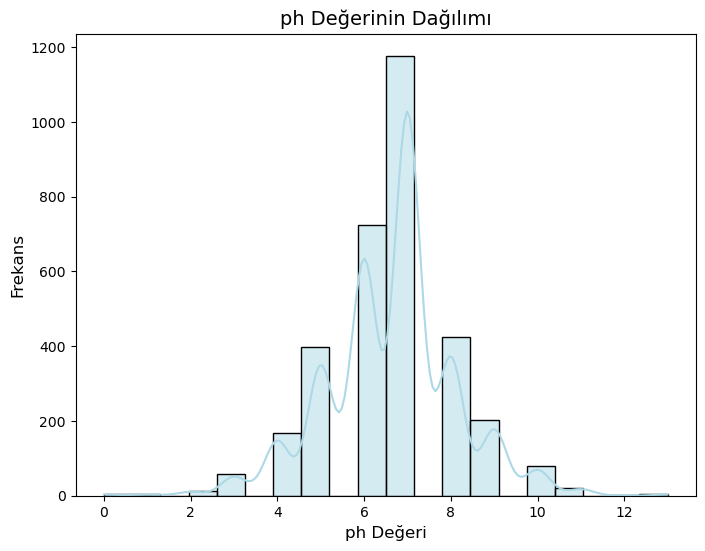

In [20]:
# Histogramı oluşturma ph değeri için
plt.figure(figsize=(8, 6))
sns.histplot(df['ph'], bins=20, color='lightblue', kde=True)
plt.title('ph Değerinin Dağılımı', fontsize=14)
plt.xlabel('ph Değeri', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.show()

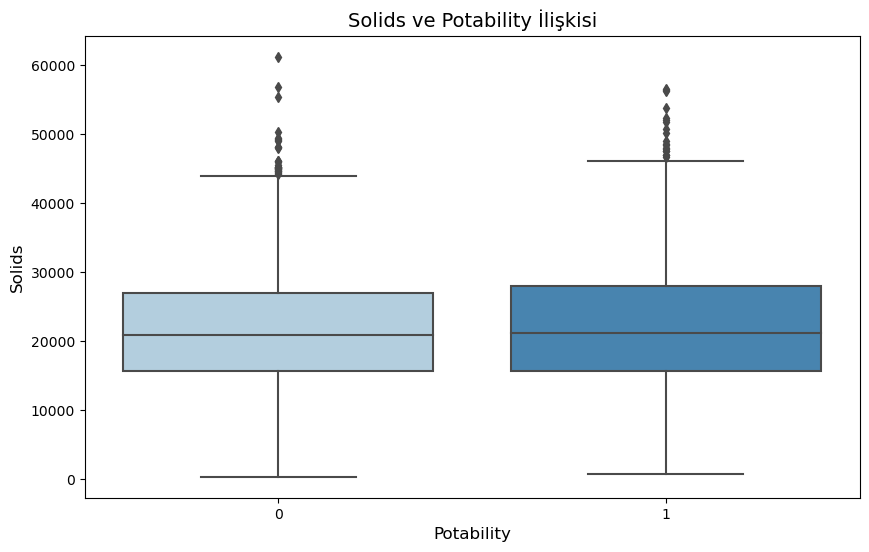

In [23]:
# Kutu grafiklerini oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x='Potability', y='Solids', data=df, palette='Blues')
plt.title('Solids ve Potability İlişkisi', fontsize=14)
plt.xlabel('Potability', fontsize=12)
plt.ylabel('Solids', fontsize=12)
plt.show()

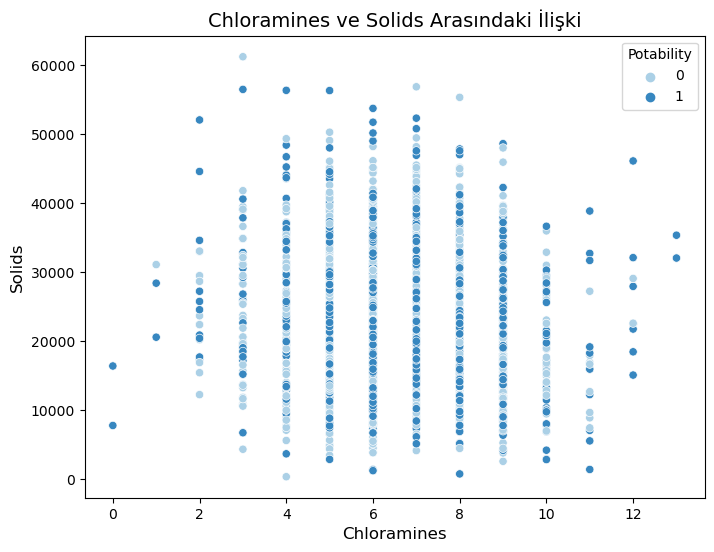

In [24]:
# Dağılım grafiğini oluşturun
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Chloramines', y='Solids', data=df, hue='Potability', palette='Blues')
plt.title('Chloramines ve Solids Arasındaki İlişki', fontsize=14)
plt.xlabel('Chloramines', fontsize=12)
plt.ylabel('Solids', fontsize=12)
plt.show()

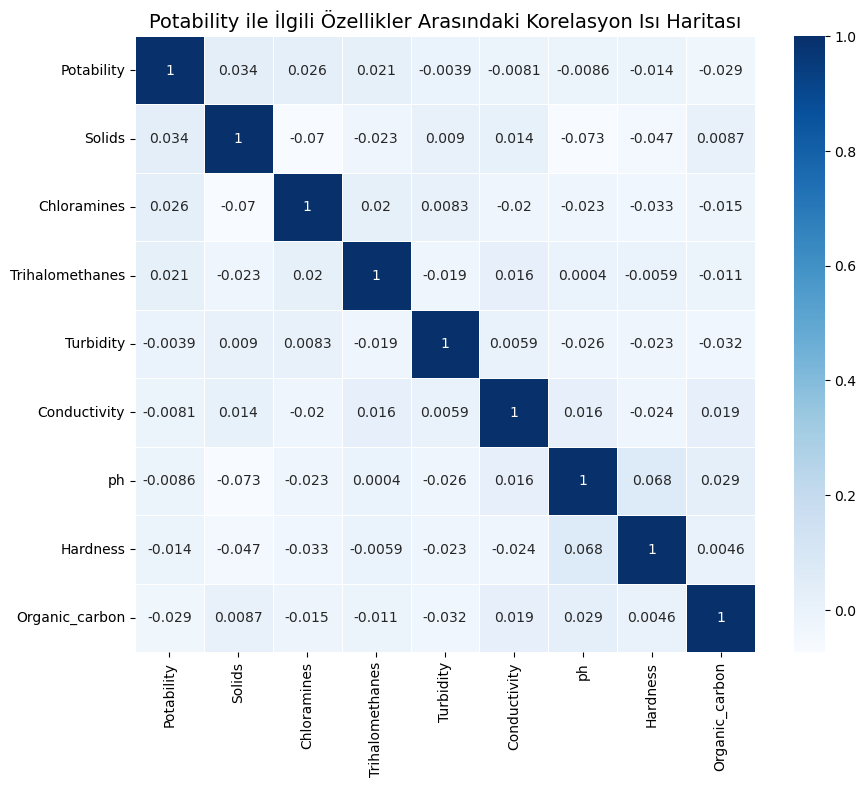

In [26]:
# Korelasyon matrisini oluşturun
corr_matrix = df.corr()

# Potability ile olan korelasyonu sıralayın ve sadece Potability ile ilişkilendiren özellikleri seçin
potability_corr = corr_matrix['Potability'].sort_values(ascending=False)

# İlgili özelliklerin bulunduğu bir alt korelasyon matrisi oluşturun
relevant_corr_matrix = df[potability_corr.index].corr()

# Isı haritasını oluşturun
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_corr_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Potability ile İlgili Özellikler Arasındaki Korelasyon Isı Haritası', fontsize=14)
plt.show()

## 4. **Özellik Mühendisliği(Feature Engineering):**

Ayrıca yapılmasına gerek duyulan bir şey kalmadı.
İsteğe göre aşağıdakiler yapılabilir.
Su analizi projesinde, veri seti üzerinde aşağıdaki gibi feature engineering (özellik mühendisliği) işlemleri yapılabilir:

1. **Özellik Ölçeklendirme (Feature Scaling):** Veri setindeki sayısal özelliklerin farklı ölçeklerde olması, bazı makine öğrenimi algoritmaları için sorun oluşturabilir. Bu nedenle, özellikleri aynı ölçekleme işlemi ile normalize edebilirsiniz. Özellikle, Standardization (Z-Score Normalizasyon) veya Min-Max Scaling gibi yöntemler kullanılabilir.

2. **Kategorik Değişken Dönüşümü:** Eğer veri setinizde kategorik değişkenler varsa (örneğin, "Şehir" gibi), bu değişkenleri sayısal değerlere dönüştürmek için One-Hot Encoding veya Label Encoding gibi teknikler kullanabilirsiniz. Ancak, su analizi projesinde genellikle sayısal verilerle çalışıldığı için bu adım sıklıkla gereksiz olabilir.

3. **Eksik Veri İşleme (Handling Missing Data):** Veri setinde eksik veriler varsa, bu eksik verileri uygun bir şekilde doldurmak veya ilgili örnekleri veri setinden çıkarmak gerekebilir. Özellikle, eksik verilerin neden kaynaklandığını ve veri setinin analiz hedeflerine nasıl etki edebileceğini anlamak önemlidir.

4. **Özellik Mühendisliği (Feature Engineering):** Su kalitesini etkileyebilecek yeni özellikler oluşturabilirsiniz. Örneğin, suyun sertliği (Hardness) ve kloramin miktarı (Chloramines) arasında bir "Hardness-Chloramines" oranı oluşturabilirsiniz ve bu yeni özelliği kullanabilirsiniz.

5. **Aykırı Değer İşleme (Outlier Handling):** Veri setinde aykırı değerler (outliers) varsa, bu aykırı değerleri ele almak için uygun bir yöntem kullanabilirsiniz. Aykırı değerleri tespit edip düzeltebilir veya filtreleyebilirsiniz.

6. **Polinom Özellikler:** Bazı özellikler arasındaki karmaşıklığı yakalamak için polinom özellikleri ekleyebilirsiniz. Özellikle, regresyon analizlerinde veya bazı sınıflandırma problemlerinde yararlı olabilir.

7. **Tarih ve Zaman Verileri:** Eğer projenizde tarih ve zaman verileri varsa, bu verileri daha anlamlı hale getirmek için saat, gün, ay gibi alt bileşenlere ayrıştırabilirsiniz.

8. **Özellik Seçimi (Feature Selection):** Gereksiz veya düşük etkili özellikleri çıkarmak için özellik seçimi teknikleri kullanabilirsiniz. Bu, modelinizi basitleştirebilir ve gereksiz karmaşıklığı azaltabilir.

Projenizin belirli gereksinimlerine bağlı olarak, bu özellik mühendisliği tekniklerini veya başka teknikleri kullanabilirsiniz. Özellik mühendisliği, veri setinizin anlamını artırmak ve makine öğrenimi modelinizin performansını iyileştirmek için önemlidir.

In [36]:
# bu işlem de başarı oranını artırmadı
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Ölçeklendirilmesini istediğiniz sayısal sütunları seçin
numerical_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Ölçeklendirilmiş veri çerçevesini oluşturun
df2 = df.copy()  # Orjinal veriyi kopyalayın
df2[numerical_columns] = scaler.fit_transform(df[numerical_columns])  # Ölçeklendirin

# Ölçeklendirilmiş veri çerçevesini yani df2 kullanarak çalışmaya devam ediyoruz.

## 5. **Veri Bölme:** ve  6. **Model Seçimi ve Eğitim:**

In [37]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [38]:
y=df2[["Potability"]]

In [39]:
class_model=df2.drop(["Potability"],axis=1)

In [40]:
x=pd.get_dummies(class_model,drop_first=True)

In [41]:
fnc_all_classification_models(x,y)

,accuracy_score
SVC,0.650915
RandomForestClassifier,0.629573
BernoulliNB,0.628049
LogisticRegression,0.628049
XGBClassifier,0.618902
GaussianNB,0.615854
KNeighborsClassifier,0.582317
DecisionTreeClassifier,0.548780


## 7. **Model Değerlendirmesi:**

In [44]:
from sklearn.svm import SVC

# SVC sınıflandırma modelini tanımlama
model = SVC(kernel='linear', C=1)

# Modeli verileri kullanarak eğitme
model.fit(x, y)  # X_train ve y_train, eğitim verilerinizdir

SVC(C=1, kernel='linear')

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Bağımsız değişkenleri ve hedef değişkeni tanımlayın
X = df.drop(columns=['Potability'])  # Bağımsız değişkenler
y = df['Potability']  # Hedef değişken

# Veriyi eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVC sınıflandırma modelini tanımlama ve eğitme
model = SVC(kernel='linear', C=1, probability=True)  # Olasılık tahminlerini etkinleştirme
model.fit(X_train, y_train)

# Tahminleri yapma
y_pred = model.predict(X_test)

# Hassasiyet (Precision) hesaplama
precision = precision_score(y_test, y_pred)

# Geri Çağırma (Recall) hesaplama
recall = recall_score(y_test, y_pred)

# F1 Puanı hesaplama
f1 = f1_score(y_test, y_pred)

# AUC ROC hesaplama
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

# Sonuçları yazdırma
print("Hassasiyet (Precision):", precision)
print("Geri Çağırma (Recall):", recall)
print("F1 Puanı:", f1)
print("AUC ROC:", roc_auc)

Hassasiyet (Precision): 0.0
Geri Çağırma (Recall): 0.0
F1 Puanı: 0.0
AUC ROC: 0.5139762056342512


## 8. **Model İyileştirme:**

**Parametre Ayarlama:** Modelin hiperparametrelerini dikkatlice ayarlayarak modelinizi iyileştirebilirsiniz. Bu, Grid Search veya Random Search gibi teknikler kullanarak en iyi hiperparametre kombinasyonlarını bulmayı içerebilir.

**Özellik Mühendisliği:** Veri setinizdeki özellikleri inceleyerek yeni özellikler oluşturabilir veya mevcut özellikleri dönüştürebilirsiniz. Özellik mühendisliği, modelinize daha fazla bilgi sağlayabilir.

**Dengesiz Veri İle Başa Çıkma:** Eğer veri setinizde sınıf dengesizliği varsa, bu dengesizliği ele alabilirsiniz. Örneğin, sınıflar arasındaki dengesizliği gidermek için ağırlıklandırma veya sentetik örnek üretme yöntemleri kullanabilirsiniz.

**Cross-Validation (Çapraz Doğrulama):** Modelinizin performansını daha güvenilir bir şekilde değerlendirmek için çapraz doğrulama kullanabilirsiniz. Bu, modelinizin daha iyi genelleme yapmasına yardımcı olabilir.

Bu adımlar, modelinizi iyileştirmek için düşünebileceğiniz bazı yolları temsil eder. Hangi adımların en iyi sonuçları vereceği veri setinizin özelliğine ve problem alanına bağlı olarak değişebilir. Her adımı dikkatlice değerlendirmek ve uygulamak önemlidir.

## 9. **Sonuçları İletme:**

Bu projeyi tamamladığımızda, su kalitesi analizi için bir makine öğrenimi modeli geliştirdik ve bu modeli performansını artırmak için çeşitli adımlarla iyileştirmeye çalıştık. Veri setimizi inceledik, eksik verileri doldurduk, özellik mühendisliği yaptık ve farklı sınıflandırma algoritmaları denedik. Ancak sonuçlar, modelin daha fazla geliştirmeye ihtiyaç duyduğunu gösterdi.

Daha ileri çalışmalarda, daha fazla veri toplama, modelin hiperparametrelerini daha dikkatli bir şekilde ayarlama ve daha fazla özellik mühendisliği yapma gibi adımlarla modelin performansını daha da artırabiliriz. Bu proje, su kalitesi analizi konusundaki temel adımları anlamamıza ve bir başlangıç noktası oluşturmamıza yardımcı oldu.

Proje tamamlanmıştır ve su kalitesi analizi için daha iyi bir model oluşturmak için gelecekteki çalışmalara kapı açmıştır.